# Basis Vectors in 2D Coordinate Space

In [1]:
%matplotlib inline

In [4]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.transforms import Affine2D
import skimage.io
import time

In [6]:
def plot_vectors(vectors, colors):


    start_x = [v[0] for v in vectors]
    start_y = [v[1] for v in vectors]

    len_x = [v[2] - v[0] for v in vectors]
    len_y = [v[3] - v[1] for v in vectors]
    
    all_x = [x[2] for x in vectors]
    all_y = [x[3] for x in vectors]
    all_x.extend(start_x)
    all_y.extend(start_y)
    

    plt.quiver(start_x, start_y, len_x, len_y, angles= "xy", scale_units= "xy", scale=1, color = colors)

    plt.xlim(min(all_x) -0.2, max(all_x) + 0.2)
    plt.ylim(min(all_y) -0.2, max(all_y) + 0.2)
    plt.gca().set_aspect("equal")
    plt.show()

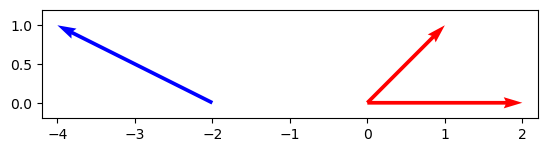

In [7]:
plot_vectors([[0, 0, 2, 0], [-2, 0, -4, 1], [0, 0, 1, 1]], ["red", "blue"]) # Two orthogonal vectors

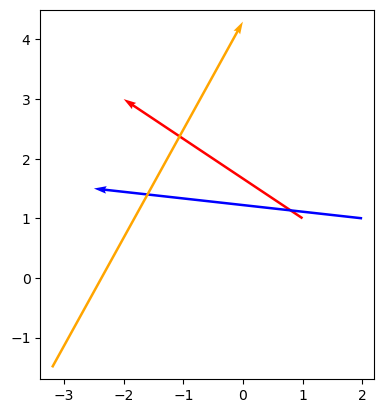

In [8]:
plot_vectors([[1, 1, -2, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"])

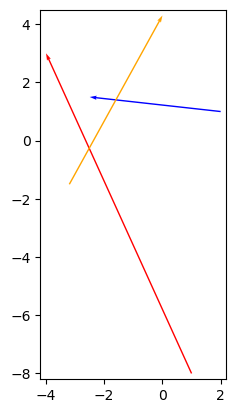

In [9]:
plot_vectors([[1, -8, -4, 3], [2, 1, -2.5, 1.5], [-3.2, -1.5, 0, 4.3]], ["red", "blue", "orange"])

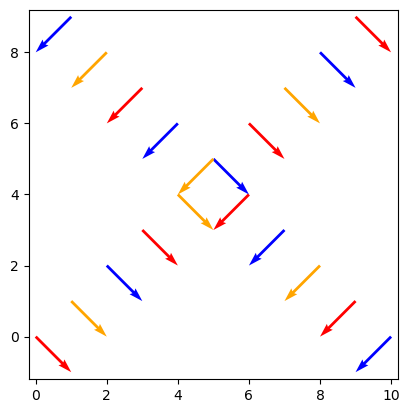

In [10]:
main_list = []
for i in range(10):
    inner_list = [i, i, i + 1, i - 1]
    inner_list_rev = [10 - i, i, 9 -i, i - 1]

    main_list.append(inner_list)
    main_list.append(inner_list_rev)


plot_vectors(main_list, ["red", "blue", "orange"])

In [11]:
# Define list of ranges
list_of_ranges = [5000, 10000, 15000, 20000, 25000]
result = {}

def list_of_ranges_to_str(list_of_ranges):
    return [str(x) for x in list_of_ranges]

#Calc coef
def get_speedup_coef(py_times, np_times):
    speedup = []
    for idx in range(len(np_times)):
        if py_times[idx] == 0:
            speedup.append(0)
        else:
            speedup.append(np_times[idx] / py_times[idx])
    return speedup

#Plot coef 
def plot_coef(coef, list_of_ranges):
    x_lables = list_of_ranges_to_str(list_of_ranges)
    plt.plot(coef, color="red")
    plt.legend(["Performance Coef)"], loc='upper left')
    plt.title("Performance Coef", fontsize="xx-large")
    plt.xlabel('Array list')
    plt.ylabel('Time spent')
    plt.xticks([0, 1, 2, 3, 4], x_lables)
    plt.show()


#Plot time results 
def plot_times(py_times, np_times, list_of_ranges):
    x_lables = list_of_ranges_to_str(list_of_ranges)
    plt.plot(py_times, color="red")
    plt.plot(np_times, color="blue")
    plt.legend(["PythonSum(list)", "NumPySum(array)"], loc='upper left')
    plt.title("Performance Test", fontsize="xx-large")
    plt.xlabel('Array list')
    plt.ylabel('Time spent')
    plt.xticks([0, 1, 2, 3, 4], x_lables)
    plt.show()

#The function accepts a num to be passed to np.rand.
#It also convert the np.array to standard array and returns two values
def generate_arrays(num):
    np_array = np.random.random(num)
    standard_list = list(np_array)
    return standard_list, np_array

def sum_arrays(array, np_arr = False):

    if np_arr:
        # Sum the np.array and record the time
        np_start = time.perf_counter()
        np_array_sum = np.sum(np_array)
        np_end = time.perf_counter() - np_start
        return round(np_array_sum, 5), np_end

    # Sum the standard one and record the time
    standart_start = time.perf_counter()
    standard_list_sum = 0
    for el in standard_list:
        standard_list_sum += el
    standard_end = time.perf_counter() - standart_start
    return round(standard_list_sum, 5), standard_end

for rng in list_of_ranges:
    #Call generate_arrays and get two array
    standard_list, np_array = generate_arrays(rng)

    standard_list_sum, standard_list_sum_time = sum_arrays(standard_list)
    
    np_array_sum, np_array_sum_time = sum_arrays(np_array, np_arr = True)

    #Check if we get equal results
    if standard_list_sum == np_array_sum:
        result[rng] = []
        result[rng].append(standard_list_sum_time)
        result[rng].append(np_array_sum_time)
        

if len(result) == len(list_of_ranges):
    py_times = []
    np_times = []
    for k, v in result.items():
        py_times.append(v[0])
        np_times.append(v[1])
    
get_speedup_coef = get_speedup_coef(py_times, np_times)

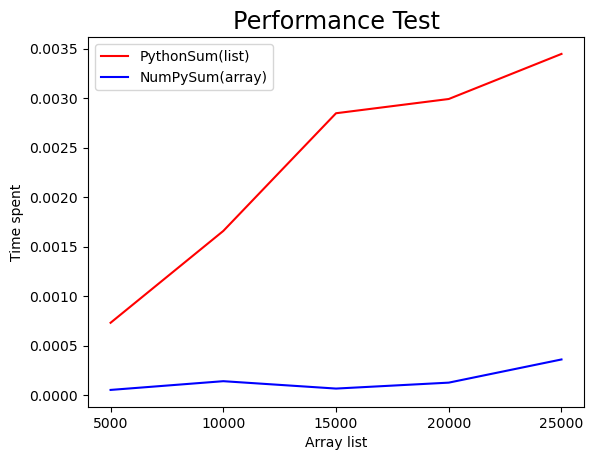

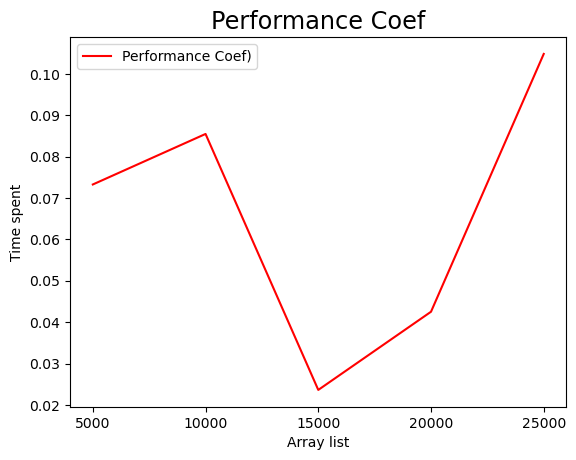

In [12]:
plot_times(py_times, np_times, list_of_ranges)
plot_coef(get_speedup_coef, list_of_ranges)

In [14]:
def visualize_transformation(matrix, plot_title):
    fig = plt.figure()
    plt.axis("equal")
    ax = fig.add_subplot(111)

    # Limits, labels and grid
    ax.set_xlim(-5, 5)
    ax.set_ylim(-5, 5)
    ax.set_xticks(np.arange(ax.get_xlim()[0], ax.get_xlim()[1] + 1))
    ax.set_yticks(np.arange(ax.get_ylim()[0], ax.get_ylim()[1] + 1))
    ax.set_xticklabels([])
    ax.set_yticklabels([])
    ax.grid()
    ax.set_title(plot_title)

    # Unit vectors
    ax.quiver([0, 0], [0, 0], [1, 0], [0, 1], color = ["red", "blue"], alpha = 0.2, units = "xy", scale = 1)

    # Transformation
    matrix = [
        [matrix[0][0], matrix[0][1], 0],
        [matrix[1][0], matrix[1][1], 0],
        [0, 0, 1],
    ]
    t = Affine2D(matrix)

    [min_x, max_x, min_y, max_y] = [2 * ax.get_xlim()[0], 2 * ax.get_xlim()[1] + 1, 2 * ax.get_ylim()[0], 2 * ax.get_ylim()[1] + 1]

    # New (transformed) grid lines
    # Horizontal
    for y in np.arange(min_y, max_y):
        ax.plot([min_x, max_x], [y] * 2, color = "red", linestyle = "--", linewidth = 2, transform = t + ax.transData)
    # Vertical
    for x in np.arange(min_x, max_x):
        ax.plot([x] * 2, [min_y, max_y], color = "blue", linestyle = "--", linewidth = 2, transform = t + ax.transData)

    # New (transformed) unit vectors
    new_x = t.transform_affine([1, 0])
    new_y = t.transform_affine([0, 1])
    ax.quiver([0, 0], [0, 0], [new_x[0], new_y[0]], [new_x[1], new_y[1]], color = ["red", "blue"], units = "xy", angles = "xy", scale = 1)

    plt.show()

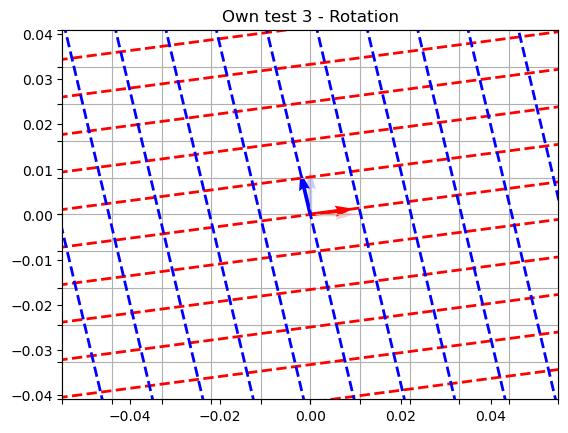

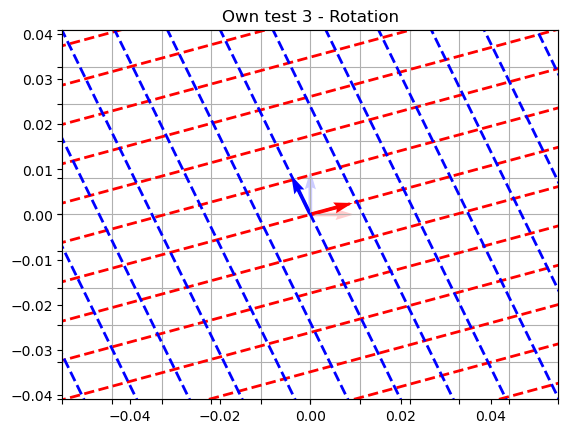

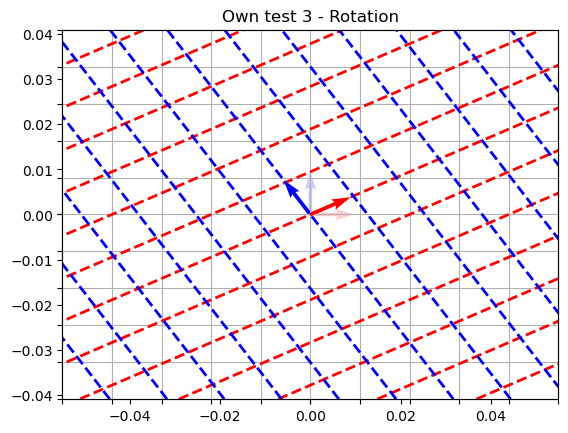

In [17]:
def generate_matrix(deg):
    matrix_rot = [
    [np.cos(np.radians(deg)), -np.sin(np.radians(deg))],
    [np.sin(np.radians(deg)), np.cos(np.radians(deg))]
]
    return matrix_rot 



for degree in [10, 20, 30]:
    visualize_transformation(generate_matrix(degree), r"Own test 4 - with Loop")

# Image processing 

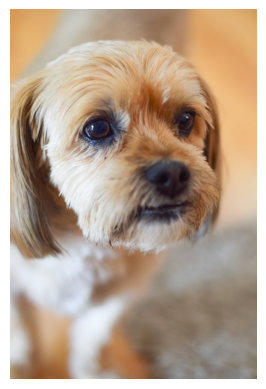

In [4]:
#1 - Fetch, read and show
def read_image(url):
    img = skimage.io.imread(url)
    return img
dog_img_url = "https://images.freeimages.com/images/large-previews/30a/dog-s-face-1641634.jpg"
actual_image = read_image(dog_img_url)
plt.imshow(actual_image)
plt.axis("off")
plt.show()


In [5]:
#2 - Get channels 
def split_channels(img):
    img_red, img_green, img_blue = [img[:, :, i] for i in range(3)]
    return img_red, img_green, img_blue

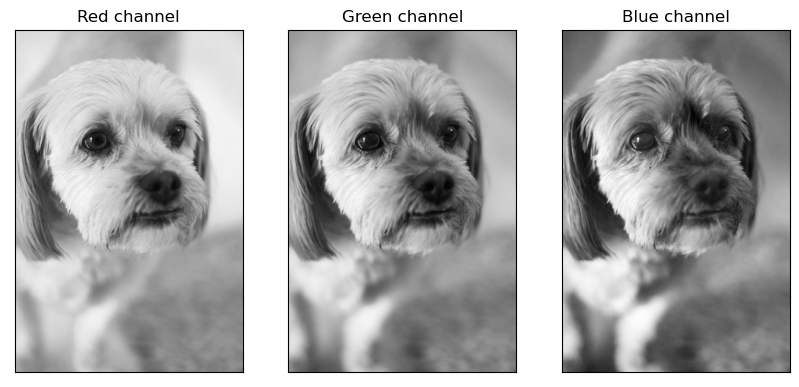

In [18]:
#3 Show channels
channel_list = ['Red channel', 'Green channel', 'Blue channel']

f, (ax_r, ax_g, ax_b) = plt.subplots(1, 3, figsize = (10, 10))
for title, channel, ax_n in zip(channel_list, split_channels(actual_image), (ax_r, ax_g, ax_b)):
    ax_n.imshow(channel, cmap = "gray")
    ax_n.set_title(title)
    plt.setp([ax_n], xticks = [], yticks = [])

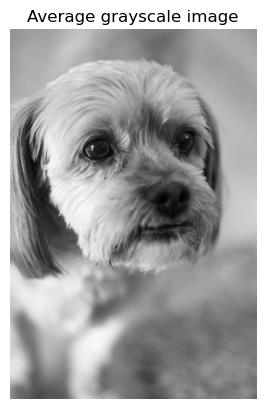

In [7]:
#4 Normalize the channels 

def norm_channels(channel_list):
    dog_r_norm, dog_g_norm, dog_b_norm = [ch / 255 for ch in channel_list]
    return dog_r_norm, dog_g_norm, dog_b_norm

dog_r_norm, dog_g_norm, dog_b_norm = norm_channels(split_channels(actual_image))
dog_image_gray = (dog_r_norm + dog_g_norm + dog_b_norm) / 3.0
plt.imshow(dog_image_gray, cmap = "gray")
plt.title("Average grayscale image")
plt.axis('off')
plt.show()

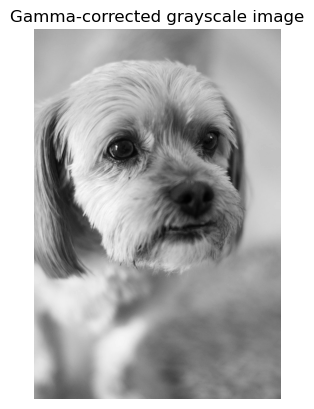

In [8]:
#5 Gamma correction
dog_image_gray_gamma_corr = (0.299 * dog_r_norm + 0.587 * dog_g_norm +  0.114 * dog_b_norm)
plt.gca().imshow(dog_image_gray_gamma_corr, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.axis('off')
plt.show()

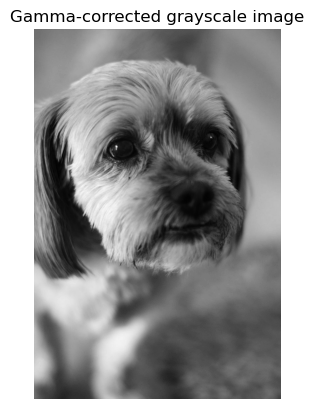

In [9]:
#6 Gamma correction - artistic touch - darker nose 
dog_image_gray_gamma_corr = (0.299 * dog_r_norm * 0.587 * dog_g_norm +  0.114 * dog_b_norm)
plt.gca().imshow(dog_image_gray_gamma_corr, cmap = plt.cm.gray)
plt.title("Gamma-corrected grayscale image")
plt.axis('off')
plt.show()

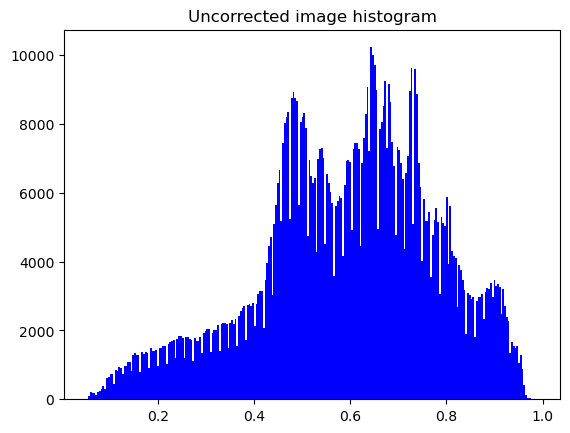

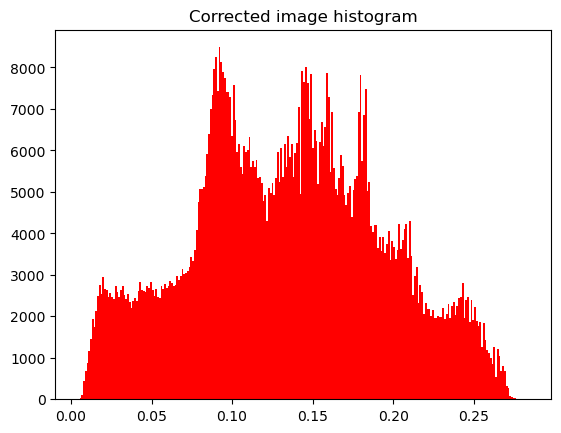

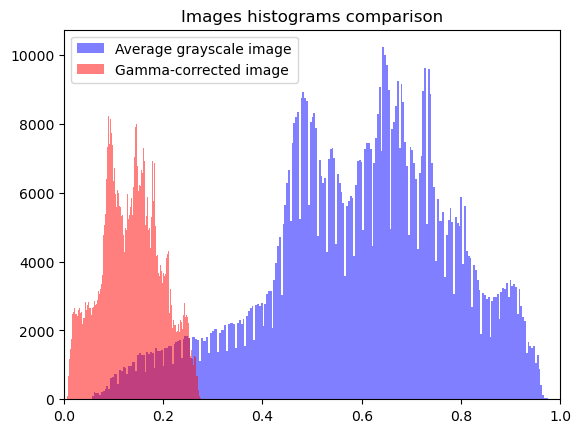

In [16]:
#7 Image histogram
plt.hist(dog_image_gray.ravel(), bins = 256, color = "blue")
plt.title("Uncorrected image histogram")
plt.show()
plt.hist(dog_image_gray_gamma_corr.ravel(), bins = 256, color = "red")
plt.title("Corrected image histogram")
plt.show()

def display_histograms_comparison(dog_gray_list, labels_list, colors):
    histograms = zip(dog_gray_list, labels_list, colors)
    for images, labels, colors in histograms:
        plt.hist(images.ravel(), bins=256, alpha=0.5, color=colors, label=labels)
    plt.xlim(0, 1)
    plt.title("Images histograms comparison")
    plt.legend()
    plt.show()

display_histograms_comparison(
    [dog_image_gray, dog_image_gray_gamma_corr],
    ["Average grayscale image", "Gamma-corrected image"],
    ["blue", "red"]
)

In [20]:
def display_rgb_images_and_their_histograms(images, titles, hist_colors, images_colors):
    image_red, image_green, image_blue = images
    image_red_title, image_green_title, image_blue_title = titles
    hist_red_color, hist_green_color, hist_blue_color = hist_colors
    image_red_color, image_green_color, image_blue_color = images_colors
    fig, ((image_r, image_g, image_b), (red_hist, green_hist, blue_hist)) = plt.subplots(2, 3, figsize=(10, 10))
    image_r.imshow(image_red, cmap=image_red_color)
    image_r.set_title(image_red_title)
    red_hist.hist(image_red.ravel(), bins=256, color=hist_red_color)
    red_hist.set_title(image_red_title)
    image_g.imshow(image_green, cmap=image_green_color)
    image_g.set_title(image_green_title)
    green_hist.hist(image_green.ravel(), bins=256, color=hist_green_color)
    green_hist.set_title(image_green_title)
    image_b.imshow(image_blue, cmap=image_blue_color)
    image_b.set_title(image_blue_title)
    blue_hist.hist(image_blue.ravel(), bins=256, color=hist_blue_color)
    blue_hist.set_title(image_blue_title)
    plt.show()

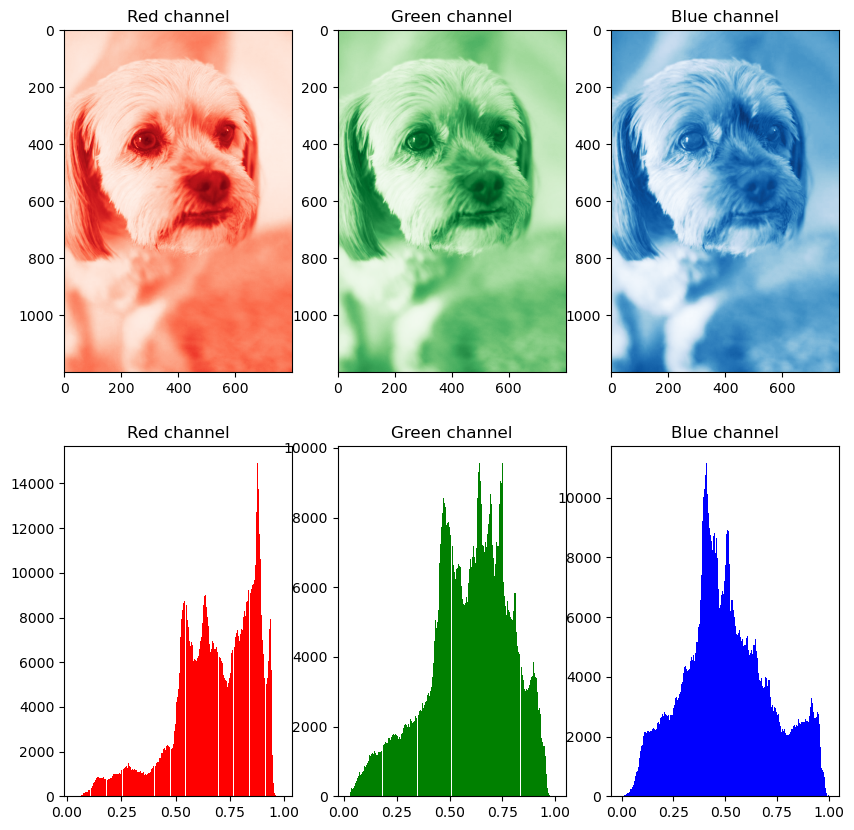

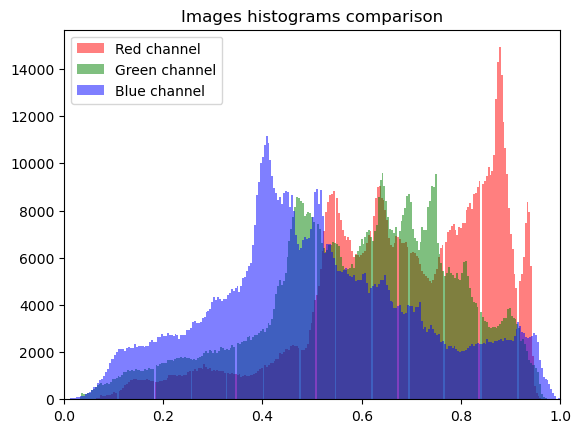

In [23]:
# Display the image channels, their histogram and comparison
display_rgb_images_and_their_histograms(
    [dog_r_norm, dog_g_norm, dog_b_norm],
    ["Red channel", "Green channel", "Blue channel"],
    ["red", "green", "blue"],
    ["Reds_r", "Greens_r", "Blues_r"]
)

display_histograms_comparison([dog_r_norm, dog_g_norm, dog_b_norm],
    ["Red channel", "Green channel", "Blue channel"],
    ["red", "green", "blue"])

ERROR: Could not find a version that satisfies the requirement cv2 (from versions: none)
ERROR: No matching distribution found for cv2
Note: you may need to restart the kernel to use updated packages.


In [ ]:
pip install --force-reinstall --no-cache -U opencv-python==4.5.5.62

In [ ]:
import cv2 as cv
import matplotlib.pyplot as plt


img = cv.imread('perspective.gif', 0)
imgc = cv.imread('perspective.gif', 0)
c, h = cv.findContours(img, cv.RETR_EXTERNAL, cv.CHAIN_APPROX_SIMPLE)
cv.drawContours(imgc, c, -1, (0, 255, 0), 3)

plt.imshow(imgc[:, :, ::-1])
